<a href="https://colab.research.google.com/github/subratamondal1/Machine-Learning-Advanced/blob/main/Insaid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Dictionary
1. **step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

2. **type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

3. **amount** - amount of the transaction in local currency.

4. **nameOrig** - customer who started the transaction

5. **oldbalanceOrg** - initial balance before the transaction

6. **newbalanceOrig** - new balance after the transaction

7. **nameDest** - customer who is the recipient of the transaction

8. **oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

9. **newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

10. **isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

11. **isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [4]:
# load data
df = pd.read_csv("/content/Fraud.csv")

In [5]:
# show data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [6]:
# shape
df.shape

(28297, 11)

# 1. Data cleaning including missing values, outliers and multi-collinearity. 

## Missing value check

In [7]:
# check missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

Three columns or attributes contains one Missing Value. Let's check them.

In [76]:
# missing value
# print(df.newbalanceDest[df.newbalanceDest.isnull()])
# print(df.loc[69857])

## Handling Missing & Duplicate values

In [11]:
print(f"Shape before: {df.shape}")
# drop missing values if any
df.dropna(inplace=True)
# drop duplicate values if any
df.drop_duplicates(inplace=True)
print(f"Shape after: {df.shape}")

Shape before: (28297, 11)
Shape after: (28296, 11)


## Categorical and Numerical columns

In [12]:
cat_cols = list(df.columns[df.nunique() <= 9])
num_cols = list(df.columns[df.nunique() > 9])
cat_cols.remove('isFraud')

target = 'isFraud'

print(f"Categorical Columns: {cat_cols}")
print(f"Numerical Columns: {num_cols}")
print(f"Target: {target}")

Categorical Columns: ['step', 'type', 'isFlaggedFraud']
Numerical Columns: ['amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest']
Target: isFraud


## Outliers

In [78]:
print("\nC A T E G O R I C A L\n")
for col in cat_cols:
  print("--"*10)
  display(df[col].value_counts())
  print("--"*15)

print("\nN U M E R I C A L\n")
for col in num_cols:
  print("--"*10)
  display(df[col].value_counts())


C A T E G O R I C A L

--------------------


8    14295
7     6837
1     2708
6     1660
2     1014
5      665
4      565
3      552
Name: step, dtype: int64

------------------------------
--------------------


PAYMENT     13913
CASH_OUT     6108
CASH_IN      5027
TRANSFER     2735
DEBIT         513
Name: type, dtype: int64

------------------------------
--------------------


0.0    28296
Name: isFlaggedFraud, dtype: int64

------------------------------

N U M E R I C A L

--------------------


25975.86     3
17320.91     3
1996.17      2
410.90       2
1553.21      2
            ..
2510.38      1
245565.33    1
5128.14      1
12910.33     1
138651.85    1
Name: amount, Length: 28181, dtype: int64

--------------------


31231006815    1
31445639249    1
31292614373    1
365515468      1
3292316998     1
              ..
31158016054    1
3851514585     1
3885018785     1
31040066455    1
3297851161     1
Name: nameOrig, Length: 28296, dtype: int64

--------------------


0.00        8067
181.00         9
126.00         9
122.00         9
198.00         8
            ... 
26811.00       1
9411.56        1
851.00         1
19932.00       1
2771.49        1
Name: oldbalanceOrg, Length: 18645, dtype: int64

--------------------


0.00          13405
4910403.44        3
9506081.11        2
2143395.30        2
43796.95          2
              ...  
84461.17          1
6715.49           1
5654.95           1
49676.03          1
153590.44         1
Name: newbalanceOrig, Length: 14860, dtype: int64

--------------------


3985934102      71
31286084959     60
31590550415     59
32083562754     58
3248609774      57
                ..
13234932558      1
131653072658     1
13206287129      1
31692066743      1
3345691183       1
Name: nameDest, Length: 17076, dtype: int64

--------------------


0.00          15080
102.00            4
1700.00           3
1122.00           2
197.00            2
              ...  
534605.20         1
147293.76         1
1003154.90        1
161722.17         1
142758.39         1
Name: oldbalanceDest, Length: 13180, dtype: int64

--------------------


0.00           15614
971418.91         32
19169204.93       29
1254956.07        25
16532032.16       24
               ...  
20171.92           1
21428.12           1
188715.38          1
317588.81          1
375659.14          1
Name: newbalanceDest, Length: 3667, dtype: int64

Numerical columns "nameOrig" and "nameDest" contains Letters along with the numbers. Now we need to treat it because ML Models will get confused due to the mixed datatype.

In [14]:
print("Before: ",df["nameOrig"].dtype)

# handle letters inside it
df["nameOrig"] = df["nameOrig"].str.replace("C","3")

# convert datatype to numeric
df["nameOrig"] = pd.to_numeric(df["nameOrig"])

print("After: ",df["nameOrig"].dtype)

Before:  object
After:  int64


In [15]:
df["nameOrig"]

0        31231006815
1        31666544295
2        31305486145
3         3840083671
4        32048537720
            ...     
28291    31046801601
28292     3457003860
28293    31845952463
28294     3140193335
28295     3297851161
Name: nameOrig, Length: 28296, dtype: int64

In [16]:
df["nameDest"]

0        M1979787155
1        M2044282225
2         C553264065
3          C38997010
4        M1230701703
            ...     
28291     C766681183
28292     C219416103
28293     C483817115
28294    C1326121635
28295    C1034382650
Name: nameDest, Length: 28296, dtype: object

In [17]:
def replace_letters(x):
  alphabets = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
  if x[0].isalpha():
    for index,value in enumerate(alphabets):
      if x[0] == value:
        return x.replace(x[0],str(index+1))
  return x.replace(x[0],str(0))

In [18]:
print("Before: ",df["nameDest"].dtype)
df["nameDest"] = df["nameDest"].apply(replace_letters)
df["nameDest"] = pd.to_numeric(df["nameDest"])
print("After: ",df["nameDest"].dtype)

Before:  object
After:  int64


In [19]:
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28296 entries, 0 to 28295
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            28296 non-null  int64  
 1   type            28296 non-null  object 
 2   isFlaggedFraud  28296 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 884.2+ KB


In [20]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28296 entries, 0 to 28295
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount          28296 non-null  float64
 1   nameOrig        28296 non-null  int64  
 2   oldbalanceOrg   28296 non-null  float64
 3   newbalanceOrig  28296 non-null  float64
 4   nameDest        28296 non-null  int64  
 5   oldbalanceDest  28296 non-null  float64
 6   newbalanceDest  28296 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 1.7 MB


# 2. Describe your fraud detection model in elaboration.

## Target class check

In [21]:
df.isFraud.value_counts(normalize=True)

0.0    0.997031
1.0    0.002969
Name: isFraud, dtype: float64

We can clearly see that the Target Column is **Imbalanced.** Therefore, it's better to use **Stratified K-Fold Cross Validation** that preserves the class distribution in each fold.

# Train Test Split

In [22]:
X = df.drop("isFraud",axis=1)
y = df.isFraud
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify=y)

X_train.shape,X_test.shape, y_train.shape,y_test.shape

((22636, 10), (5660, 10), (22636,), (5660,))

## OneHotEncoding

In [23]:
# For X_train
dummy = pd.get_dummies(X_train[cat_cols], drop_first=True)

# Add the result to the master dataframe
X_train = pd.concat([X_train, dummy], axis=1)

print(X_train.shape)
X_train.head()

(22636, 16)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,step,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
143,1,PAYMENT,8550.90,31795225096,40060.00,31509.10,13790094605,0.00,0.00,0.0,1,0.0,0,0,1,0
21351,8,CASH_OUT,84675.82,3573086220,0.00,0.00,31100439041,168705.77,419710.62,0.0,8,0.0,1,0,0,0
23094,8,CASH_IN,20879.30,343891835,3360398.39,3381277.69,32066777507,24156.59,3277.29,0.0,8,0.0,0,0,0,0
17878,8,CASH_IN,55981.26,3382595762,3681203.14,3737184.40,3392292416,4759923.96,6564973.20,0.0,8,0.0,0,0,0,0
18091,8,CASH_OUT,282236.96,31902450382,567.00,0.00,3711248671,182125.58,1522032.15,0.0,8,0.0,1,0,0,0


In [24]:
X_train.drop(cat_cols, axis=1, inplace=True)
print(X_train.shape)
X_train.head()

(22636, 11)


,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
143,8550.90,31795225096,40060.00,31509.10,13790094605,0.00,0.00,0,0,1,0
21351,84675.82,3573086220,0.00,0.00,31100439041,168705.77,419710.62,1,0,0,0
23094,20879.30,343891835,3360398.39,3381277.69,32066777507,24156.59,3277.29,0,0,0,0
17878,55981.26,3382595762,3681203.14,3737184.40,3392292416,4759923.96,6564973.20,0,0,0,0
18091,282236.96,31902450382,567.00,0.00,3711248671,182125.58,1522032.15,1,0,0,0


In [25]:
# For X_test
dummy = pd.get_dummies(X_test[cat_cols], drop_first=True)

# Add the result to the master dataframe
X_test = pd.concat([X_test, dummy], axis=1)

print(X_test.shape)
X_test.head()

(5660, 16)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,step,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
804,1,TRANSFER,326349.91,31950136544,0.00,0.00,3564160838,778150.49,1254956.07,0.0,1,0.0,0,0,0,1
9578,7,PAYMENT,34061.71,3944009331,0.00,0.00,131458893701,0.00,0.00,0.0,7,0.0,0,0,1,0
7483,7,CASH_OUT,157442.78,3402104751,0.00,0.00,31477979030,9231426.19,10780596.35,0.0,7,0.0,1,0,0,0
16625,8,CASH_OUT,314756.65,3438909887,102924.00,0.00,31870237274,0.00,1180032.06,0.0,8,0.0,1,0,0,0
28079,8,PAYMENT,2693.56,3743080989,535054.62,532361.05,13748104388,0.00,0.00,0.0,8,0.0,0,0,1,0


In [26]:
X_test.drop(cat_cols, axis=1, inplace=True)
print(X_test.shape)
X_test.head()

(5660, 11)


,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
804,326349.91,31950136544,0.00,0.00,3564160838,778150.49,1254956.07,0,0,0,1
9578,34061.71,3944009331,0.00,0.00,131458893701,0.00,0.00,0,0,1,0
7483,157442.78,3402104751,0.00,0.00,31477979030,9231426.19,10780596.35,1,0,0,0
16625,314756.65,3438909887,102924.00,0.00,31870237274,0.00,1180032.06,1,0,0,0
28079,2693.56,3743080989,535054.62,532361.05,13748104388,0.00,0.00,0,0,1,0


## Scaling Numerical data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
# For X_train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# For X_test
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [30]:
X_train.head()

,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
143,-0.416494,0.943325,-0.340961,-0.345663,-0.636124,-0.338315,-0.385157,0,0,1,0
21351,-0.167307,-1.049998,-0.359961,-0.360332,-0.299841,-0.271081,-0.249718,1,0,0,0
23094,-0.376138,-1.278075,1.233836,1.213827,-0.281069,-0.328688,-0.384100,0,0,0,0
17878,-0.261236,-1.063452,1.385990,1.379520,-0.838119,1.558652,1.733340,0,0,0,0
18091,0.479388,0.950898,-0.359692,-0.360332,-0.831923,-0.265733,0.105998,1,0,0,0


## Correlation

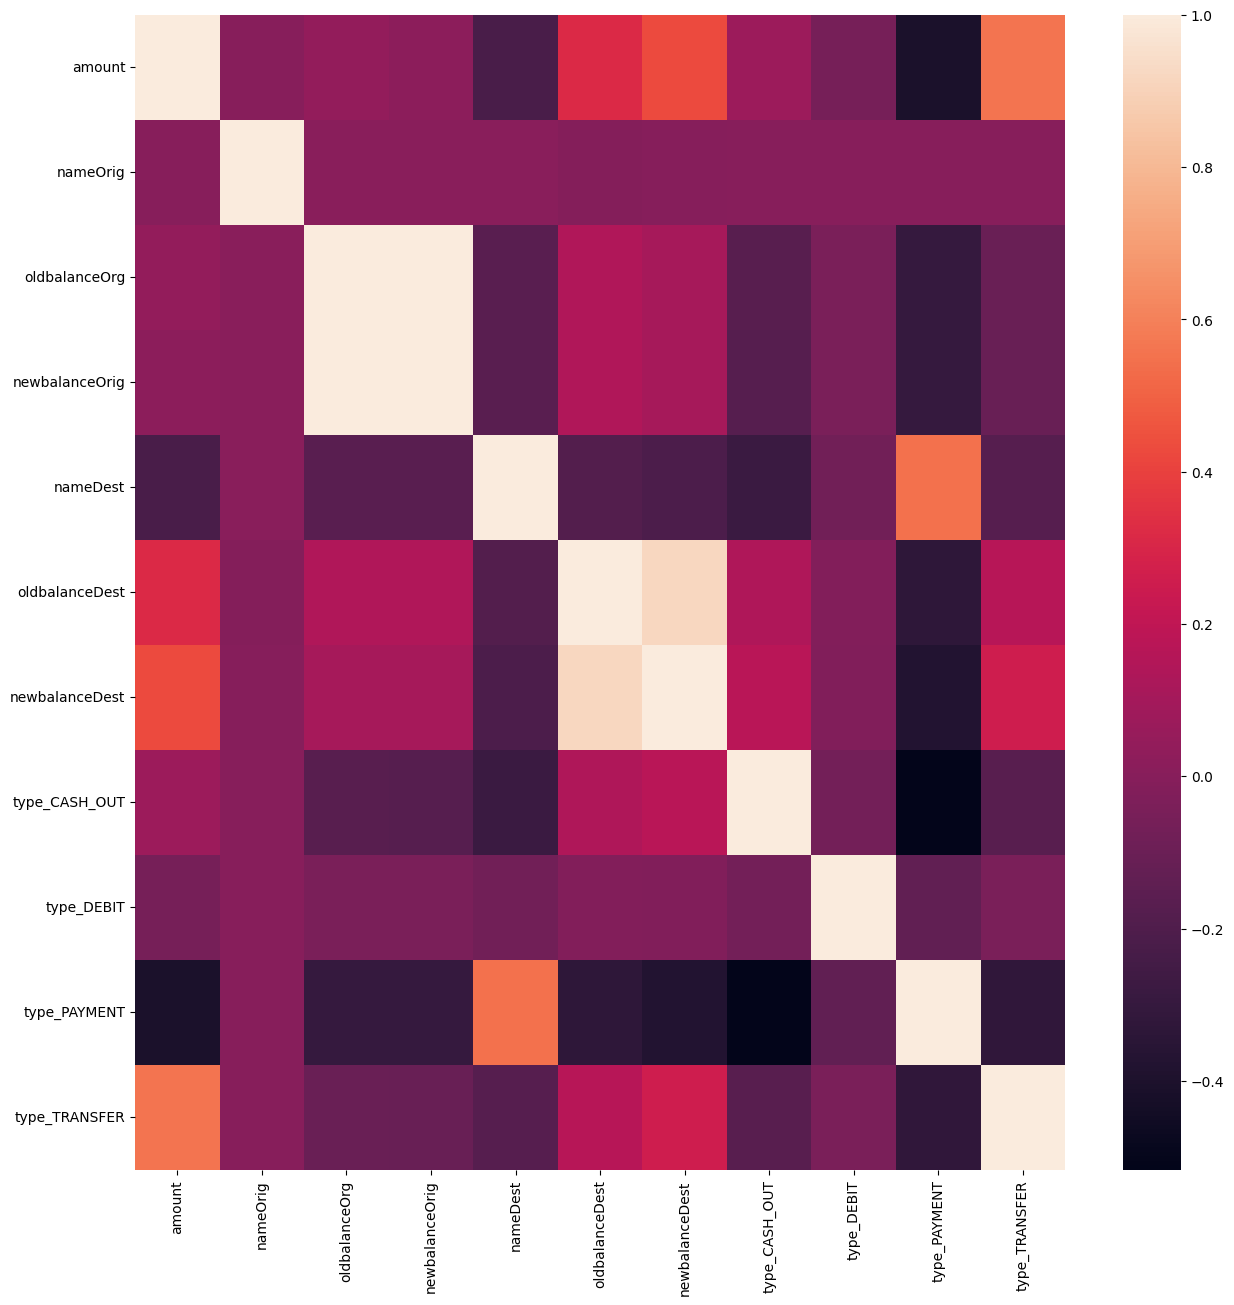

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr())
plt.show()

## Multicollinearity

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
# Create a dataframe for VIF values
vif_df = pd.DataFrame()
# Add column names to the dataframe
vif_df['variable'] = df[num_cols].columns
# Calculate VIF for each variable
vif_df['VIF'] = [variance_inflation_factor(df[num_cols].values, i) for i in range(df[num_cols].shape[1])]

# Print the VIF dataframe
print(vif_df)

         variable         VIF
0          amount    1.584448
1        nameOrig    1.658206
2   oldbalanceOrg  296.727351
3  newbalanceOrig  297.227303
4        nameDest    1.409327
5  oldbalanceDest    7.544840
6  newbalanceDest    8.376169


In [32]:
# check the training and testing data shape
print(f"Train shape:{X_train.shape}")
print(f"Test shape:{X_test.shape}")

Train shape:(22636, 11)
Test shape:(5660, 11)


# 3. How did you select variables to be included in the model?

## Feature Selection

In [33]:
# run random forest to get feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 25).fit(X_train, y_train)

feats = X_train.columns

for feature in zip(feats, rf.feature_importances_):
    print(feature)

('amount', 0.27854973231434926)
('nameOrig', 0.08725359554311726)
('oldbalanceOrg', 0.17072514063898528)
('newbalanceOrig', 0.024166805972330674)
('nameDest', 0.09726452381480906)
('oldbalanceDest', 0.15584839094891026)
('newbalanceDest', 0.15769368087721844)
('type_CASH_OUT', 0.0068918406454194165)
('type_DEBIT', 0.001316313209517312)
('type_PAYMENT', 0.004780007862364834)
('type_TRANSFER', 0.01550996817297828)


In [34]:
imp_df = pd.DataFrame({
    "Features": X_train.columns,
    "Importance": rf.feature_importances_
})

imp_df.sort_values(by="Importance", ascending=False)

,Features,Importance
0,amount,0.278550
2,oldbalanceOrg,0.170725
6,newbalanceDest,0.157694
5,oldbalanceDest,0.155848
4,nameDest,0.097265
1,nameOrig,0.087254
3,newbalanceOrig,0.024167
10,type_TRANSFER,0.015510
7,type_CASH_OUT,0.006892
9,type_PAYMENT,0.004780


Features	Importance
1.	amount: 0.278550
2.	oldbalanceOrg: 0.170725
3.	newbalanceDest: 0.157694
4.	oldbalanceDest:	0.155848
5.	nameDest:	0.097265
6.	nameOrig:	0.087254
7.	newbalanceOrig: 0.024167
8.	type_TRANSFER: 0.015510
9.	type_CASH_OUT: 0.006892
10.	type_PAYMENT: 0.004780
11.	type_DEBIT:	0.001316

## Handling Class Imbalance

In [35]:
# check the training and testing data shape
print(f"Train shape:{X_train.shape}")
print(f"Test shape:{X_test.shape}")

Train shape:(22636, 11)
Test shape:(5660, 11)


### SMOTE
SMOTE - Synthetic Minority Oversampling Technique Creates new "Synthetic" observations

Process
1. Identify the feature vector and its nearest neighbour
2. Take the difference between the two
3. Multiply the difference with a random number between 0 and 1
4. Identify a new point on the line segment by adding the random number to feature vector
5. Repeat the process for identified feature vectors

In [51]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

45138

### Random Oversample

In [52]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

45138

### ADASYN

1. In ADASYN, the minority examples are generated based on their density distribution.
2. More synthetic data are generated from minority class samples that are harder to learn as compared with those minority samples that are easier to learn.


In [53]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada), len(y_resampled_ada)

(45146, 45146)

### Random Forest Classifier

In [54]:
# Random Forest - Base
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# 4. Demonstrate the performance of the model by using best set of tools. 

In [55]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9969964664310954
F1 score:  0.10526315789473684
Recall:  0.058823529411764705
Precision:  0.5

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5643
         1.0       0.50      0.06      0.11        17

    accuracy                           1.00      5660
   macro avg       0.75      0.53      0.55      5660
weighted avg       1.00      1.00      1.00      5660


 confussion matrix:
 [[5642    1]
 [  16    1]]


In [56]:
# Random Forest - Random Over-Sampling
rf_os = RandomForestClassifier()
rf_os.fit(X_resampled_os, y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

# 4. Demonstrate the performance of the model by using best set of tools. 

In [57]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_os))
print ('F1 score: ', f1_score(y_test, y_pred_rf_os))
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
print ('Precision: ', precision_score(y_test, y_pred_rf_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_os))

Accuracy:  0.9969964664310954
F1 score:  0.10526315789473684
Recall:  0.058823529411764705
Precision:  0.5

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5643
         1.0       0.50      0.06      0.11        17

    accuracy                           1.00      5660
   macro avg       0.75      0.53      0.55      5660
weighted avg       1.00      1.00      1.00      5660


 confussion matrix:
 [[5642    1]
 [  16    1]]


In [58]:
# Random Forest - SMOTE
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

# 4. Demonstrate the performance of the model by using best set of tools. 

In [59]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))

Accuracy:  0.9943462897526502
F1 score:  0.27272727272727276
Recall:  0.35294117647058826
Precision:  0.2222222222222222

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5643
         1.0       0.22      0.35      0.27        17

    accuracy                           0.99      5660
   macro avg       0.61      0.67      0.63      5660
weighted avg       1.00      0.99      0.99      5660


 confussion matrix:
 [[5622   21]
 [  11    6]]


In [62]:
# Random Forest - ADASYN
rf_ada = RandomForestClassifier()
rf_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_rf_ada = rf_ada.predict(X_test)

## Hyper-parameter tuning using Cross Validation for Random Forest ADASYN model

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
hyper_params = {'max_depth': range(3, 10),
                'max_features': range(3, 10),
                'min_samples_leaf': range(20, 200, 50),
                'n_estimators': range(10, 51, 10)}

# Performing Randomizedsearch for Random Forest ADASYN model
model_rcv = RandomizedSearchCV(estimator=rf_ada, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=20)

model_rcv.fit(X_resampled_ada, y_resampled_ada)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(3, 10),
                                        'max_features': range(3, 10),
                                        'min_samples_leaf': range(20, 200, 50),
                                        'n_estimators': range(10, 51, 10)},
                   return_train_score=True, verbose=1)

In [65]:
model_rcv.best_score_

0.9759006263440296

In [66]:
# Displaying best values for hyperparameters
model_rcv.best_estimator_ 

RandomForestClassifier(max_depth=8, max_features=8, min_samples_leaf=20,
                       n_estimators=30)

In [67]:
# Naming the best model rf_best
rf_best = model_rcv.best_estimator_ 

In [68]:
# Displaying the hyperparametres
rf_best 

RandomForestClassifier(max_depth=8, max_features=8, min_samples_leaf=20,
                       n_estimators=30)

In [69]:
# Predicting the is_fraud variable for test data
y_pred_rcv = rf_best.predict(X_test) 

In [84]:
# Evaluation Metrics - We see that we get good accuracy and Recall values
print ('Accuracy: ', accuracy_score(y_test, y_pred_rcv))
print ('F1 score: ', f1_score(y_test, y_pred_rcv))
print ('Recall: ', recall_score(y_test, y_pred_rcv))
print ('Precision: ', precision_score(y_test, y_pred_rcv))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rcv))

Accuracy:  0.981095406360424
F1 score:  0.20740740740740743
Recall:  0.8235294117647058
Precision:  0.11864406779661017

 clasification report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      5643
         1.0       0.12      0.82      0.21        17

    accuracy                           0.98      5660
   macro avg       0.56      0.90      0.60      5660
weighted avg       1.00      0.98      0.99      5660



In [91]:
con_matrix = confusion_matrix(y_test, y_pred_rcv)
print ('\n confussion matrix:\n',con_matrix)
# [[TN FP]
#  [FN TP]]

TN = con_matrix[0][0]
TP = con_matrix[1][1]
FP = con_matrix[0][1]
FN = con_matrix[1][0]


 confussion matrix:
 [[5539  104]
 [   3   14]]


In [74]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_rcv)

0.9025497492989754

<Axes: >

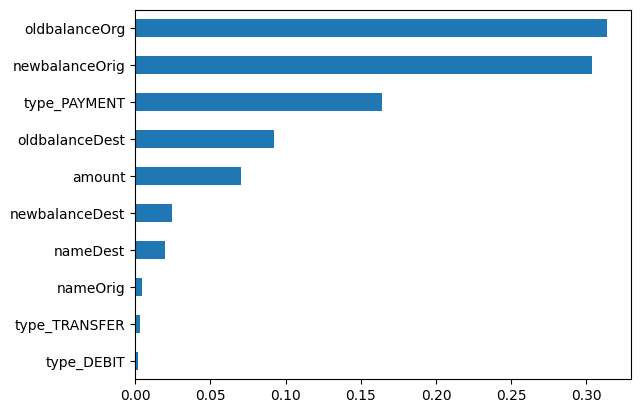

In [73]:
# list of important features

importances = rf_best.feature_importances_
weights = pd.Series(importances,
                 index=X_resampled_ada.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

# 5. What are the key factors that predict fraudulent customer? 
The key factors are:
* oldbalanceOrg: initial balance before the transaction
* newbalanceOrig: new balance after the transaction
* type: PAYMENT
* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
* amount - amount of the transaction in local currency.

# 6. Do these factors make sense? If yes, How? If not, How not? 
Yes! These factors definitely makes sense. It's logical to see compare the balance before and after the transaction. In most of the cases the fraud happend while doing PAYMENT and when the amount was in Local Currency.

# 7. What kind of prevention should be adopted while company update its infrastructure?
We need to keep an eye on while doing PAYMENT in the local currency and when the amount is big.

# 8. Assuming these actions have been implemented, how would you determine if they work?
* **Calculate the fraud detection rate:** This is the percentage of fraudulent transactions or cases that are detected by the system out of the total number of fraudulent transactions or cases that occur. A higher fraud detection rate indicates a better performance of the system.

In [83]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rcv))

Accuracy:  0.981095406360424


* **Calculate the false positive rate:** This is the percentage of legitimate transactions or cases that are flagged as fraudulent by the system out of the total number of legitimate transactions or cases that occur. A lower false positive rate indicates a better accuracy of the system.

In [92]:
FPR = FP / (FP + TN)
FPR

0.018429913166755272

* **Conduct user feedback surveys:** This is a way to collect qualitative data from the users of the fraud detection system.